### mFHN模型的 Hamilton 能量

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from numba import njit, prange
# 自定义函数
from FHN_mag import *

#### 定义 Hamilton energy

In [49]:
@njit
def Hamilton(x, y, phi, c, alpha, beta, u_0, omega, A, t):
    """
        计算哈密顿量
    """
    u_s = u_0 + A * np.cos(omega * t)
    H = x*x/2 + y*y/(2*c) - (alpha * phi + beta * phi**3) * (x - u_s) / 2
    
    return H

In [50]:
N = 1

a =  0.3
b = 1.
c = 0.1
alpha = 0.1
beta = 0.3
u_0 = 0.2
A = 0.8
omega = 0.7

method = "euler"               # "rk4", "euler"
nodes = FHN_mag(N=N, method=method)  #
nodes.params_nodes["omega"] = omega
nodes.params_nodes["A"] = A
nodes.params_nodes["u_0"] = u_0
nodes.params_nodes["alpha"] = alpha
nodes.params_nodes["beta"] = beta
nodes.params_nodes["a"] = a
nodes.params_nodes["b"] = b
nodes.params_nodes["c"] = c

In [51]:
for i in range(100_00):
    nodes()

time = []
mem = []

H_mean = 0.

nodes.record_spike_times = True
ncal = 2000_00
for i in range(ncal):
    nodes()
    x, y, phi = nodes.vars_nodes
    t = nodes.t
    H_mean += Hamilton(x, y, phi, c, alpha, beta, u_0, omega, A, t) / ncal
    time.append(nodes.t)
    mem.append(nodes.vars_nodes[0].copy())

In [52]:
print("H_mean = ", H_mean)

H_mean =  [1.82851823]


In [53]:
valid_spike_times = nodes.return_spike_times()
# print(valid_spike_times)
# print(nodes.cal_isi())
print(nodes.cal_cv())

[0.00014929]


In [54]:
# kop_list = nodes.cal_kop(min_spikes=3)
# first_last_spk, last_first_spk = kop_list[-1]  
# print(kop_list[0])

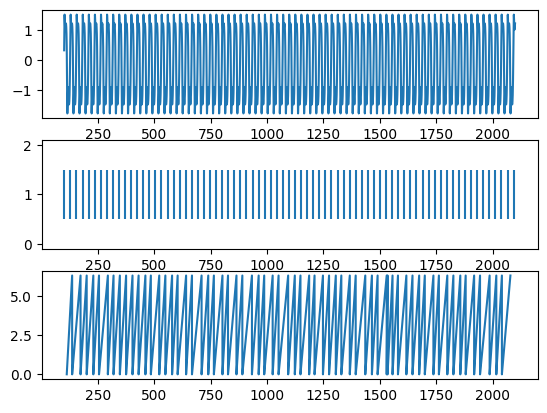

In [55]:
ax1 = plt.subplot(311)
plt.plot(time, mem)
plt.subplot(312, sharex=ax1)
plt.eventplot(valid_spike_times)
plt.subplot(313, sharex=ax1)
plt.plot(np.linspace(first_last_spk, last_first_spk, kop_list[2].shape[1]), kop_list[2].T)

plt.show()